In [20]:
import gym
from agents.dqn import DQNAgent
from utils.screen import SpaceInvaderScreen
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.color import rgb2gray

%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [21]:
env = gym.make('SpaceInvaders-v0')

[2017-12-27 16:18:07,359] Making new env: SpaceInvaders-v0


In [22]:
num_inputs = 100 * 144 * 60
agent = DQNAgent(num_inputs, env.action_space)

(80, 80, 3)


/home/flo/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


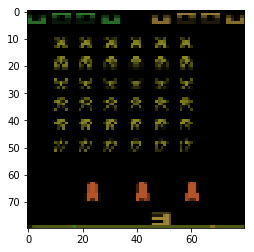

In [31]:
screen = SpaceInvaderScreen(env, dim=(80, 80, 3))
screen.init()
frame = screen.get_current_frame()
print(frame.shape)
plt.imshow(frame.squeeze())

In [8]:
print(env.observation_space.shape)
print(env.action_space.n)

(210, 160, 3)
6


/home/flo/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


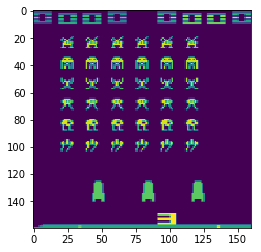

In [5]:
frame = screen.frame
frame = rgb2gray(frame)
frame = frame[8:-12, 4:-16] # 8, 12, 4, 16
frame = resize(frame, (160, 160))

plt.imshow(frame)

In [6]:
env.reset()
done = False
total_reward = 0
obs = None
imagelist = list()
frames = 0

while not done:
    action = env.action_space.sample()
    obs, reward, done, _ = env.step(action)
    imagelist.append(obs)
    total_reward += reward
    
frames = len(imagelist)

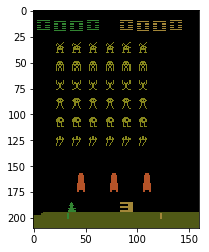

In [7]:
import matplotlib.animation as animation
fig = plt.figure() # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=255)

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(frames), 
                              interval=50)

plt.show()